# TurboJet Performance Analysis
evaluation of the performance of the propulsion in respect to the rotation in the following different conditions:

mach :      0

Pa   : 101.30

Ta   : 288.20

### Part 1
importing classes and defining auxiliary functions to load aircraft and setting analysis parameters

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from aircraft import Aircraft
from calculation_modules.propulsion.propulsion_wrapper import PropulsionWrapper


def load_aircraft(aircraft_name):
    ''' Import Propulsion from file'''
    aircraft = Aircraft(aircraft_name)
    aircraft.load_aircraft()

    return aircraft

def set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag=True):
    ''' Setting Computation Parameters'''
    propulsion_wrapper = PropulsionWrapper(aircraft)
    propulsion_wrapper.set_mach(mach)
    propulsion_wrapper.set_pressure_a(Pa)
    propulsion_wrapper.set_outlet_pressure(Po)
    propulsion_wrapper.set_temperature_a(Ta)
    propulsion_wrapper.set_compressor_rotation(N_2)
    propulsion_wrapper.set_rotation_flag(rotation_flag)
    return propulsion_wrapper    



### Part 2
Defining and loading aircraft, getting the components (compressor, combustor) that we will vary the parameters. To get a component we need to specify the stream_id of the component and its name.

In [6]:

''' Component Parameters'''
aircraft_name = 'TurboFan23'
aircraft = load_aircraft(aircraft_name)

### Part 3
Defining the analysis parameters, condition of flight and rotation list.

In [7]:
''' Analysis Parameters'''
mach = 0
Pa = 101.63
Po = Pa
Ta = 290
list_of_N_2 = np.linspace(0.5, 1.0, 20)
rotation_flag = True
list_of_TSFC = []
list_of_specific_thrust = []
list_of_thermal_efficiency = []
list_of_propulsion_efficiency = []

### Part 4
Iterating through the rotation.



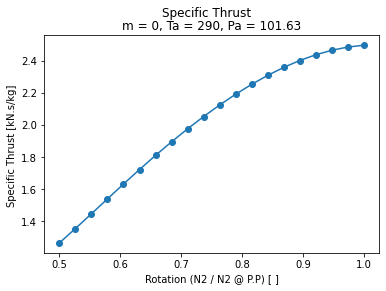

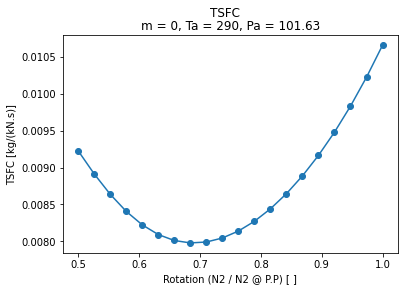

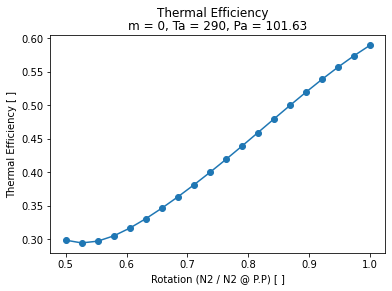

In [8]:
for N_2 in list_of_N_2:
    propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag)
    propulsion_wrapper.initialize()
    propulsion_wrapper.compute()
    propulsion_results = propulsion_wrapper.get_results()
    
    list_of_TSFC.append(propulsion_results.get_TSFC())
    list_of_specific_thrust.append(propulsion_results.get_specific_thrust())
    list_of_thermal_efficiency.append(propulsion_results.get_thermal_efficiency())
    list_of_propulsion_efficiency.append(propulsion_results.get_propulsion_efficiency())

fig1 = plt.figure()
fig1.suptitle("Specific Thrust")
axis1 = fig1.add_subplot(111)
axis1.plot(list_of_N_2, list_of_specific_thrust, marker='o')
axis1.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
axis1.set_ylabel("Specific Thrust [kN.s/kg] ")
axis1.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")

fig2 = plt.figure()
fig2.suptitle("TSFC")
axis2 = fig2.add_subplot(111)
axis2.plot(list_of_N_2, list_of_TSFC, marker='o')
axis2.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
axis2.set_ylabel("TSFC [kg/(kN.s)]")
axis2.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")

fig3 = plt.figure()
fig3.suptitle("Thermal Efficiency")
axis3 = fig3.add_subplot(111)
axis3.plot(list_of_N_2, list_of_thermal_efficiency, marker='o')
axis3.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))

axis3.set_ylabel("Thermal Efficiency [ ]")
axis3.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")

plt.show(block=False)



    